# W2M5 - Sentiment Analysis

---

## 학습 목표
- 레이블링된 텍스트 데이터를 시각화하는 방법을 배운다.
- 작은 데이터셋을 직접 만들어서 전체 과정을 체험해 본다.

## 사전지식
- The dataset has 1.6 million tweets, with no missing values in any column.
- Each tweet has a target sentiment (0 for negative,2 neutral, 4 for positive), an ID, a timestamp, a flag (query or 'NO_QUERY'), the username, and the text.
- The sentiment targets are balanced, with an equal number of positive and negative labels.

## 기능요구사항
- Jupyter notebook에 프로세스 과정을 출력하고 결과 그래프도 출력하세요.
- Positive Sentiment, Negative Sentiment에 각각 해당하는 단어들을 모아서 word cloud를 화면에 표시하세요.
    - Word Cloud를 만들 때 사용할 단어들은 sampling을 통해서 선택하세요.
    - 하나의 word cloud에는 최대 200개의 단어만 표시하세요.

## 프로그래밍 요구사항
- pandas 라이브러리를 사용하세요
- matplotlib 라이브러리를 사용하세요
- wordcloud 라이브러리를 사용하세요
- 2개의 word cloud는 하나의 plot에 그리세요


## 팀 활동견적
- 사용자 데이터셋과 사용자 데이터셋을 웹 스크레이핑을 통해 만든 다음, 워드 클라우드를 만들면 됩니다.
    - 데이터셋을 만들 때 어떤 작업이 필요한가요?
    - 프로토타입에는 최소 1,000개 이상의 데이터를 사용하세요.
- 해당 분석을 통해 어떤 비즈니스 가치를 만들 수 있는지에 대해 토의하겠습니다.


---

# Final W2M5

/Users/admin/Documents/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


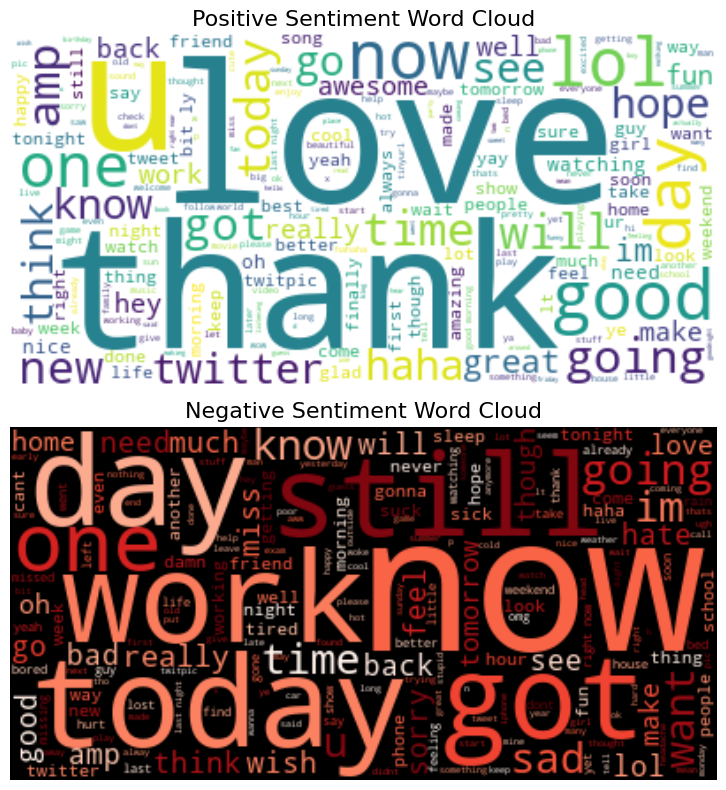

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os
import zipfile
import subprocess

# sentiment140 데이터셋 다운로드
dataset_name = "kazanova/sentiment140"
os.system(f"kaggle datasets download -d {dataset_name}")

# 데이터 압축 해제
zip_file = "sentiment140.zip"
extract_dir = "sentiment140"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 데이터 로드 (추출된 CSV 파일의 경로 확인)
data_path = os.path.join(extract_dir, "training.1600000.processed.noemoticon.csv")
data = pd.read_csv(data_path, encoding='latin-1', header=None)

# 컬럼 이름 지정
data.columns = ['Sentiment', 'ID', 'Date', 'Flag', 'User', 'Text']

# Positive(4)와 Negative(0) 텍스트 필터링
positive_texts = data[data['Sentiment'] == 4]['Text']
negative_texts = data[data['Sentiment'] == 0]['Text']

# 불용어 설정
stopwords = set(STOPWORDS)
additional_stopwords = {'quote', 'example', 'quot'}  # 추가로 제거할 단어들
stopwords.update(additional_stopwords)

# 텍스트 전처리 함수
def preprocess_text(texts):
    combined_text = " ".join(texts).lower()  # 단일 문자열로 결합된 텍스트가 필요하므로 join 사용
    words = combined_text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

# 전처리된 텍스트 생성 (샘플링 10,000개)
positive_words = preprocess_text(positive_texts.sample(10000))
negative_words = preprocess_text(negative_texts.sample(10000))

# Word Cloud 생성
positive_wordcloud = WordCloud(stopwords=stopwords, max_words=200, background_color="white").generate(positive_words)
negative_wordcloud = WordCloud(stopwords=stopwords, max_words=200, background_color="black", colormap="Reds").generate(negative_words)

# Word Cloud 시각화
plt.figure(figsize=(15, 8))

# Positive Word Cloud
plt.subplot(2, 1, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=16)

# Negative Word Cloud
plt.subplot(2, 1, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=16)

plt.tight_layout()
plt.show()

---

# 팀 활동 요구사항

- ### **제공된 데이터셋과 유사한 데이터셋을 웹 스크레이핑을 통해 만든 다음, word cloud를 만들어 봅시다.**
    -  구글 플레이 리뷰를 스크래핑해서, 리뷰의 반응을 긍정(별점 5점) 중립(별 3-4점) 부정(1-2점)으로 나눔.
    - https://play.google.com/store/apps/details?id=com.velox.hkmc_tm1k 현대 블루링크 앱을 분석하는데 사용
    - google_play_scrap 라이브러리 사용
    - 데이터셋을 만들 때 구글 플레이 스토어 리뷰는 일반적으로 사용자 입력 데이터이므로 노이즈가 많아 추가적인 전처리 과정이 필요할 듯 하다 (불필요한 텍스트 제거 등).
    - Sentiment140 데이터셋은 이미 감정 레이블이 포함되어 있지만, 구글 플레이 스토어 리뷰는 별점 정보로 레이블을 추출해야함 (우리가 리뷰의 반응을 긍정(별점 5점) 중립(별 3-4점) 부정(1-2점)으로 나눔)
    - 현대 블루링크 앱과 같은 도메인은 특정 제품/기술 용어와 관련된 텍스트가 많을 수 있으므로 불용어 처리를 해야함 (현대”, “차량”, “블루링크”처럼 자주 등장하지만 의미 없는 단어를 불용어로 처리)
    - 구글 플레이 스토어 리뷰는 여러 국가에서 작성된 리뷰를 포함할 수 있으므로, 국가별 데이터를 수집하고 비교 분석해야함



- ### **해당 분석을 통해 어떤 비즈니스 가치를 만들 수 있을지에 대해 토의합시다.**
    > M5 해당 분석을 통해 어떤 비즈니스 가치를 만들 수 있을까?
    >> 나의 의견
    - 리뷰 분류를 통해 고객 만족도 파악할 수 있을 것 같다. 우리가 현재 KPT를 사용하여 잘한 점은 유지하고, 문제점은 고치려고 노력하듯, 직접적인 고객들의 리뷰를 통하여 긍정적으로 평가된 항목은 유지하고, 문제점으로 분류된 항목은 개선 방안에 대해 노력해볼 수 있을 것 같다.
    - 부정 리뷰에서 자주 등장하는 단어들(예: “버그”, “느림”, “충돌”)을 통해 기술적 문제를 파악하고 우선적으로 해결 가능할지도..?
    - 같은 방법으로 경쟁사에 애플리케이션의 리뷰를 가져와서 현대 앱의 강점과 약점을 파악하여 해결 방안을 도출 할 수 있을 것이다.

    >> 팀원 의견 추가
    - 버전에 따라서 웹스크래핑을 하면, 버전에 따라서 반응들의 추이도 알 수 있을 것 같다.
    - 업계의 주요 큰 문제 (예. 통신)가 어떤 건지 추가적인 조사도 가능할 듯 하다.


---

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


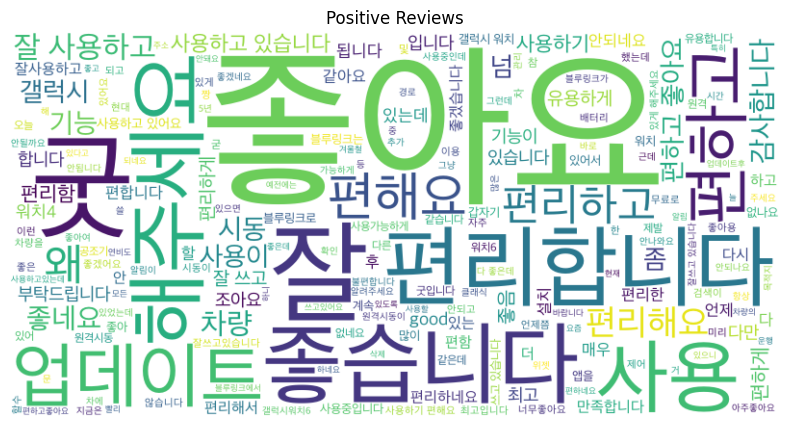

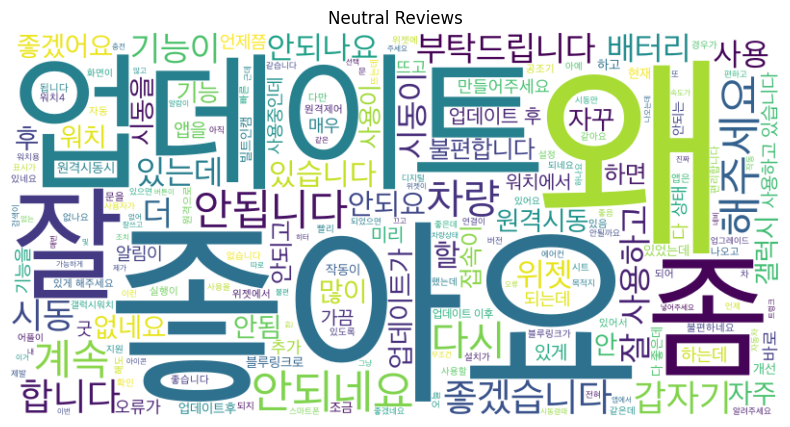

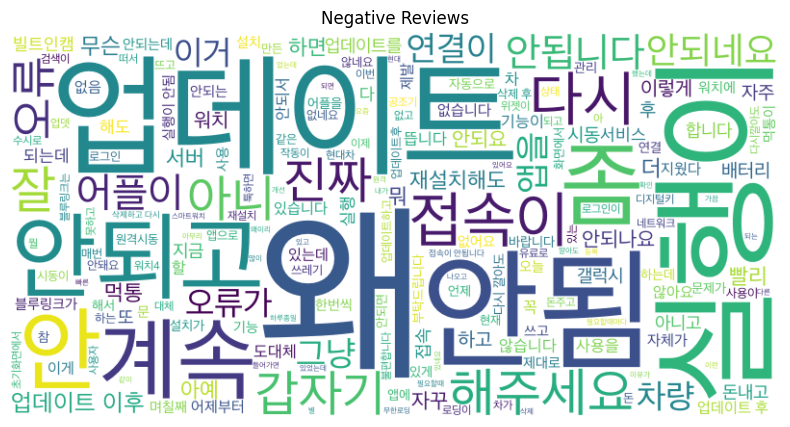

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google_play_scraper import reviews_all, Sort

import re
from nltk.corpus import stopwords

# NLTK 불용어 다운로드 (최초 1회 실행 필요)
import nltk
nltk.download('stopwords')

# 한국어 불용어 리스트에 단어 추가
korean_stopwords = [
    '이', '그', '저', '것', '수', '저희', '저것', '그것', '들', '때',
    '그리고', '그러나', '하지만', '블루링크', '어플', '아주', '너무', '정말',
    '또한', '그래서', '때문', '어디', '무엇',  '어떻게',
    '앱', '앱이'  
]

app_id = 'com.velox.hkmc_tm1k'  
reviews = reviews_all(
    app_id,
    lang='ko',  
    country='kr', 
    sort=Sort.NEWEST  
)

# 데이터프레임 생성
df = pd.DataFrame(reviews)
#df.to_csv('reviews.csv', index=False)

# 리뷰 분류
positive_reviews = df[df['score'] == 5].head(1000)
neutral_reviews = df[df['score'].isin([3, 4])].head(1000)
negative_reviews = df[df['score'].isin([1, 2])].head(1000)

# 조사 빼는 함수
def remove_korean_postpositions(text):
    postpositions = r'\b(이|가|은|는|을|를|에|의|와|과|로|으로|에서|에게|한테|밖에|마저|조차|까지|도|만|처럼|보다|부터|까지|이라|라고)\b'
    text = re.sub(postpositions, '', text)
    return text

def preprocess_text(text):
    # text_clean 함수 적용
    text = text_clean(text)
    text = text.lower()
    
    # 한국어 조사 제거
    text = remove_korean_postpositions(text)
    
    # 한국어와 영어 불용어 제거
    all_stop_words = set(stopwords.words('english')) | set(korean_stopwords)
    text = ' '.join([word for word in text.split() if word not in all_stop_words])
    return text

# 텍스트 정제 함수
def text_clean(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'  # E-mail 제거
    text = re.sub(pattern, '', text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'  # URL 제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거    
    # text = re.sub(pattern, '', text)
    # pattern = '([a-zA-Z0-9]+)'   # 알파벳, 숫자 제거  
    text = re.sub(pattern, '', text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호 제거
    text = re.sub(pattern, '', text)
    return text

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        max_words=200,
        background_color='white',
        font_path='/System/Library/Fonts/Supplemental/AppleSDGothicNeo.ttc'  # 한글 폰트 경로 설정
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    
# 긍정 리뷰 워드 클라우드
positive_text = ' '.join(positive_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(positive_text, 'Positive Reviews')

# 중립 리뷰 워드 클라우드
neutral_text = ' '.join(neutral_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(neutral_text, 'Neutral Reviews')

# 부정 리뷰 워드 클라우드
negative_text = ' '.join(negative_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(negative_text, 'Negative Reviews')

---

# 추가 요구 사항 - word cloud의 작동 방법 (어떤 로직으로 시각화가 이루어지는지)

### Word Cloud란?
- 태그 클라우드라고도 불리우며, 문서의 키워드, 개념 등을 직관적으로 파악할 수 있도록 핵심 단어를 시각화하는 기법
- 빅데이터를 분석할 때 데이터의 특징을 도출하거나 해당 데이터의 주요 키워드를 알아볼 때 많이 사용함

### 텍스트 데이터 전처리 과정
- 자연어 처리 (NLP) 기법을 사용하여 텍스트를 단어 또는 문장 단위로 토큰화함. 정규 표현식이나 spaCy, NLTK 같은 라이브러리가 사용되는 듯 하다.
- 정규 표현식을 활용하거나 전처리 라이브러리를 사용해서 텍스트 정규화

### 단어 빈도 계산
- **Term Frequency (TF) 사용하여** 각 단어의 등장 횟수를 계산. 이는 Word Cloud에서 단어의 크기와 직접적으로 연관.
- **TF-IDF (Term Frequency-Inverse Document Frequency)를** 단어의 중요도를 강조하기 위해 사용.  단어가 특정 문서에서 자주 등장하지만, 전체 문서에서는 드물게 등장할 때 중요도가 높아지는 기법



### 단어 배치 알고리즘
Word Cloud는 효율적인 공간 활용과 시각적 매력을 위해 다양한 배치 알고리즘을 사용함
-  Filling by Rectangle Packing
    - 단어는 직사각형 박스로 간주되며, 가장 큰 단어를 중심부터 배치
    - 각 단어를 배치할 때 충돌을 방지하고, 기존 단어와 겹치지 않도록 최적의 위치를 계산
    - 이 과정은 `Bounding Box Collision Detection` 알고리즘으로 구현

- Spiral Layout Algorithm
    - 단어는 중심에서 나선형으로 배치되며, 충돌이 발생하지 않을 때까지 이동

- Shape Constraining
    - 특정 모양(예: 원형, 사각형, 사용자 정의 이미지)에 단어를 배치
    - 이를 위해 이미지의 픽셀 밀도를 기준으로 단어가 배치 가능한 영역을 정의

### 최적화 기법
- Greedy Algorithm: 공간을 효율적으로 활용하기 위해 단어 배치를 최적화
- Heuristic Search: 배치 충돌을 최소화하는 최적의 단어 위치를 탐색
- Parallel Computing: 큰 데이터셋의 경우 병렬 처리를 통해 성능을 향상


---

# 추가학습거리 - Summary를 읽고 난 후 소감

> 나의 소감  

데이터를 통하여 선거 결과를 예측하는 방법과 그 결과가 매우 혁신적이었다고 느꼈다. 또한 전통적인 방법과 비교했을 때보다 소셜 미디어 데이터를 활용한 방법이 더 높은 정확성을 갖는다는 사실이 놀라웠다. 전통적인 방법이라면 사전 투표 조사나 전화 조사 등과 같은 꽤나 직접적인 방법을사용했을텐데, 비교적 속마음이 더 많이 표현되어서일까? 정확도가 더 높았다는 사실이 놀라웠다. 

개인적으로, 단순히 데이터 과학 기술의 성공적인 활용 사례를 넘어, 기술과 사회적 문제의 연결 가능성을 보여주는 좋은 예라고 느꼈다. 이러한 데이터를 이용한 방식이 전통적인 방법보다 더 빠르고 정확한 결과를 낼 뿐만 아니라, 대중의 목소리를 더욱 직접적으로 반영한다는 점에서 의미가 있는 것 같다. 특히 트위터라는 플랫폼이 가진 실시간성과 방대한 사용자 기반을 활용하여 94.2%의 예측 정확도를 달성한 것은 매우 놀라웠다.  

이를 통해 느낀 또 다른 중요한 점은, 소셜 미디어 데이터가 선거 결과 예측뿐만 아니라, 사회적 문제 해결에 광범위하게 활용될 수 있는 잠재력을 가지고 있다는 것아다. 예를 들어, 정책의 효과를 실시간으로 평가하거나, 대중의 요구를 더 잘 반영한 의사결정을 내리는 데에도 큰 역할을 할 수 있을 것 같다.  

물론 아러한 접근법이 가지는 현실적인 한계도 생각해보게 되었다. 트위터 데이터가 모든 유권자 집단을 대표하지 못할 가능성, 또는 허위 정보와 자동화된 봇 계정의 영향 같은 문제가 여전히 존재하지 않을까 싶다. 하지만 이러한 한계를 극복하기 위한 추가 연구가 이루어진다면, 지금의 높은 정확도보다 더 높은 신뢰도와 적용 가능성을 확보할 수 있을 것 같다. 
  
결론적으로 생각해보면 논문에서 사용된 방법론과 결과는 데이터 과학이 정치 및 사회적 현상 분석에 실질적으로 기여할 수 있음을 잘 보여준 것이 아닐까 싶다.

 